In [1]:
import sys
from os import getcwd
import os
from os.path import basename, dirname
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
from scipy import stats
import random
import statsmodels
from statsmodels.tsa.seasonal import STL
from statsmodels.tools.eval_measures import rmse
import yfinance as yf
import argparse
import sys



/home/lirannoc/.conda/envs/da/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import darts
from darts.models import NBEATSModel,BlockRNNModel,RNNModel,ExponentialSmoothing, TCNModel, TransformerModel
from statsmodels.tsa.seasonal import STL
from darts.utils.data import TrainingDataset, PastCovariatesTrainingDataset
from darts.utils.data import PastCovariatesInferenceDataset
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.datasets import AirPassengersDataset, AusBeerDataset
from darts.dataprocessing.transformers.boxcox import BoxCox

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse


sys.path.append('/cs_storage/lirannoc/research/2')  
import da_transformations as da
import da_forecasting
from da_datasets import UnivariateDataset, get_dataset



datasets = ['AirPassengers']
seasonality = 12
df = AirPassengersDataset().load().pd_dataframe()
passengers = df["#Passengers"]
data = passengers


models = ['RNN','N-BEATS-G','N-BEATS-I','TRANSFORMER']
split = 0.7
reps = 1
inlen = 12
outlen = 6

In [4]:
data = get_dataset('AirPassengers')[0]
seasonality = 12

## Baseline

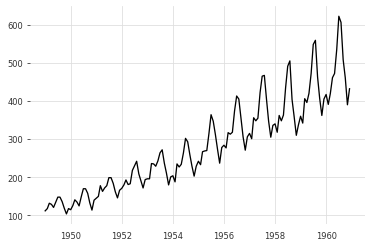

In [5]:
plt.plot(data)
plt.show()

# Identity

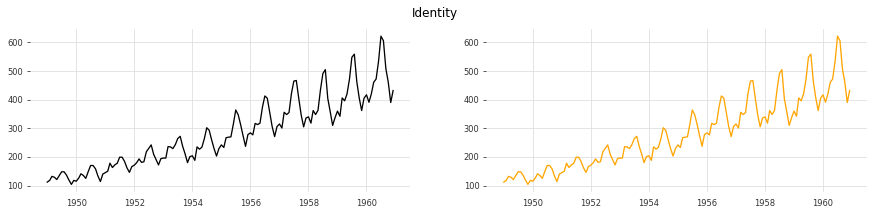

In [6]:
da.plot_augmentation(data,seasonality,"Identity")

# Jittering

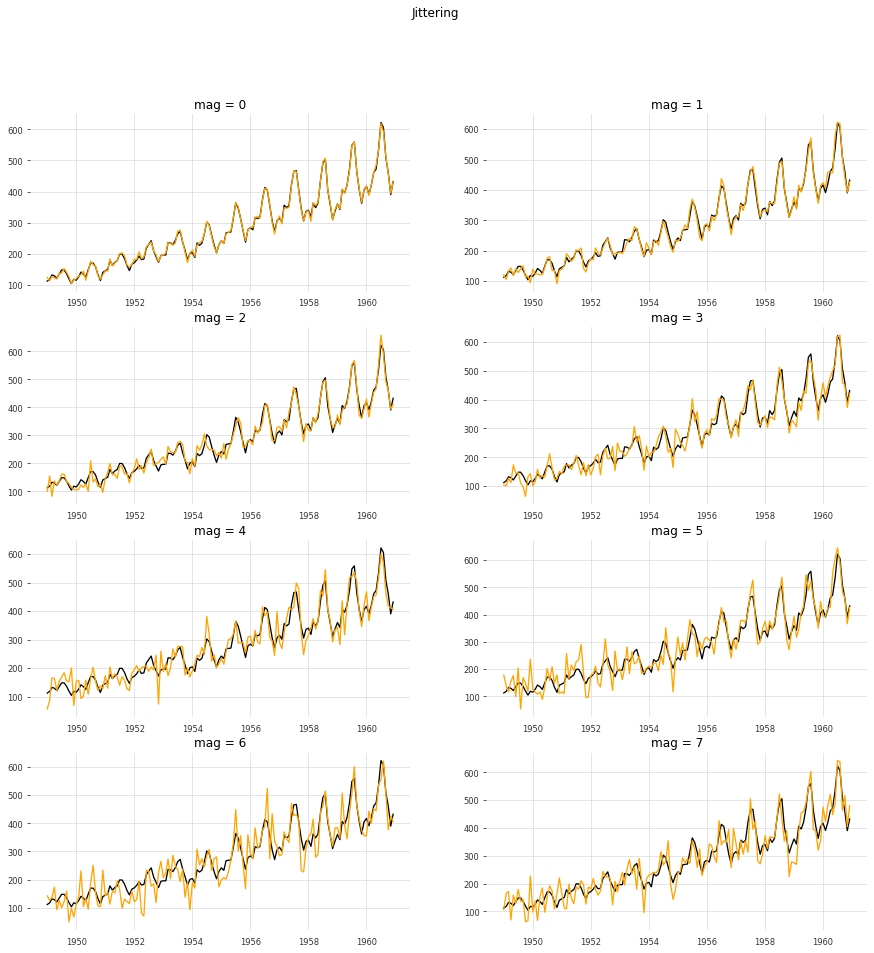

In [7]:
da.plot_augmentation(data,seasonality,"Jittering")

# Noise Scale

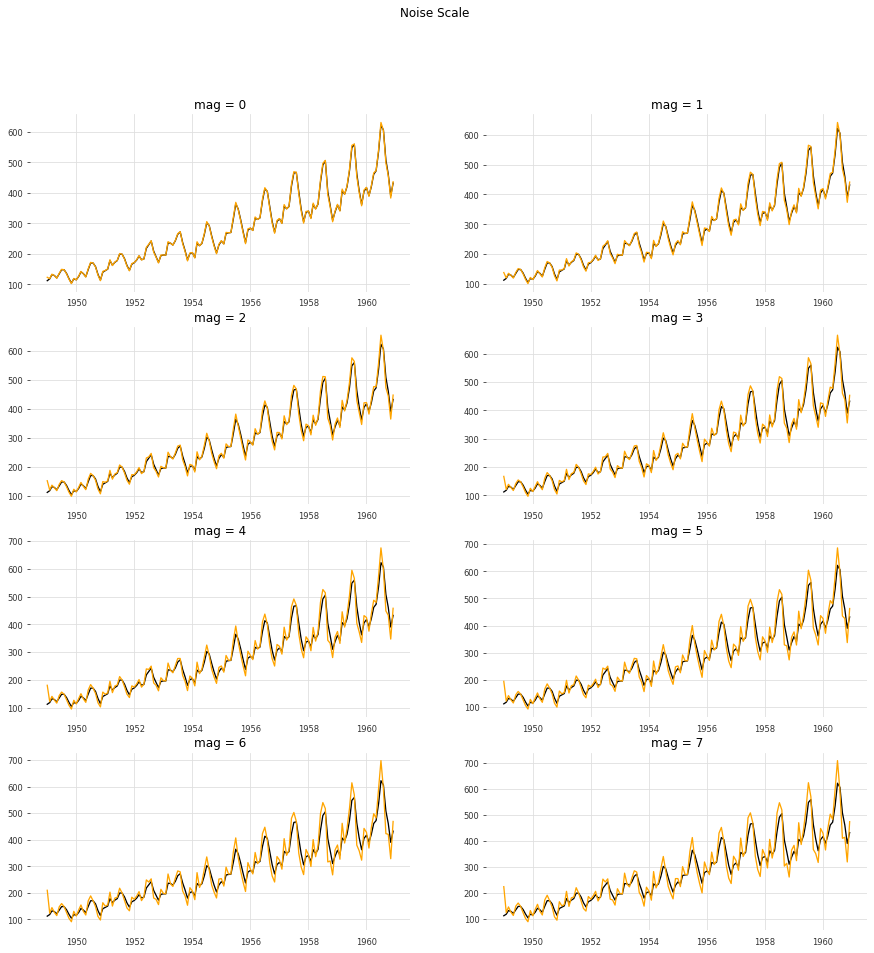

In [5]:
da.plot_augmentation(data,seasonality,"Noise Scale")

# Flip

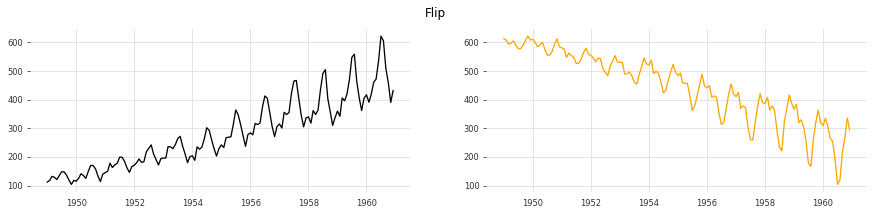

In [8]:
da.plot_augmentation(data,seasonality,"Flip")

# Trend Scale

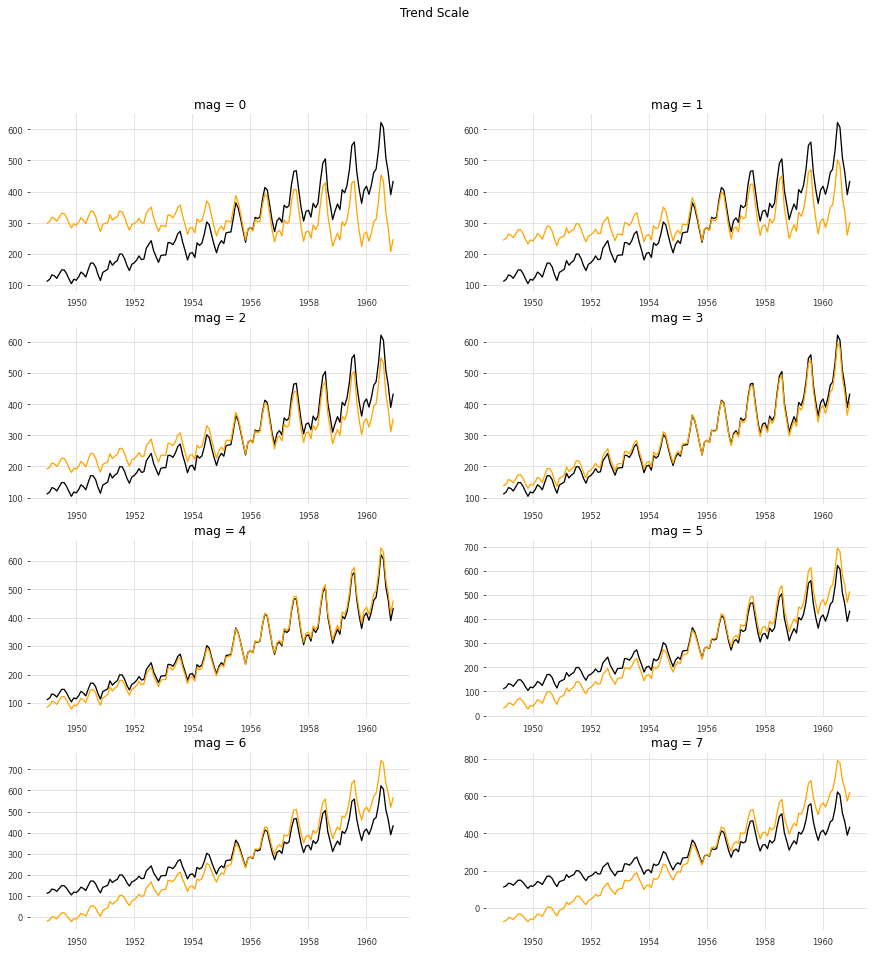

In [9]:
da.plot_augmentation(data,seasonality,"Trend Scale")

# Permutation

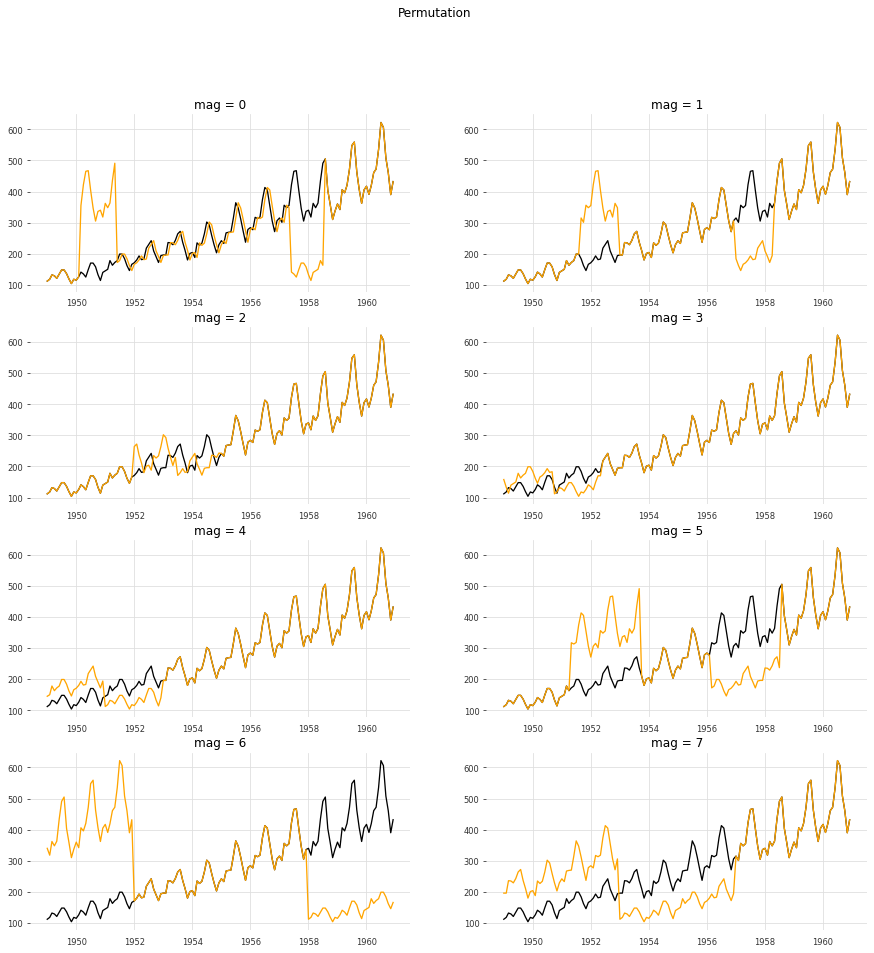

In [10]:
da.plot_augmentation(data,seasonality,"Permutation")

# Scale

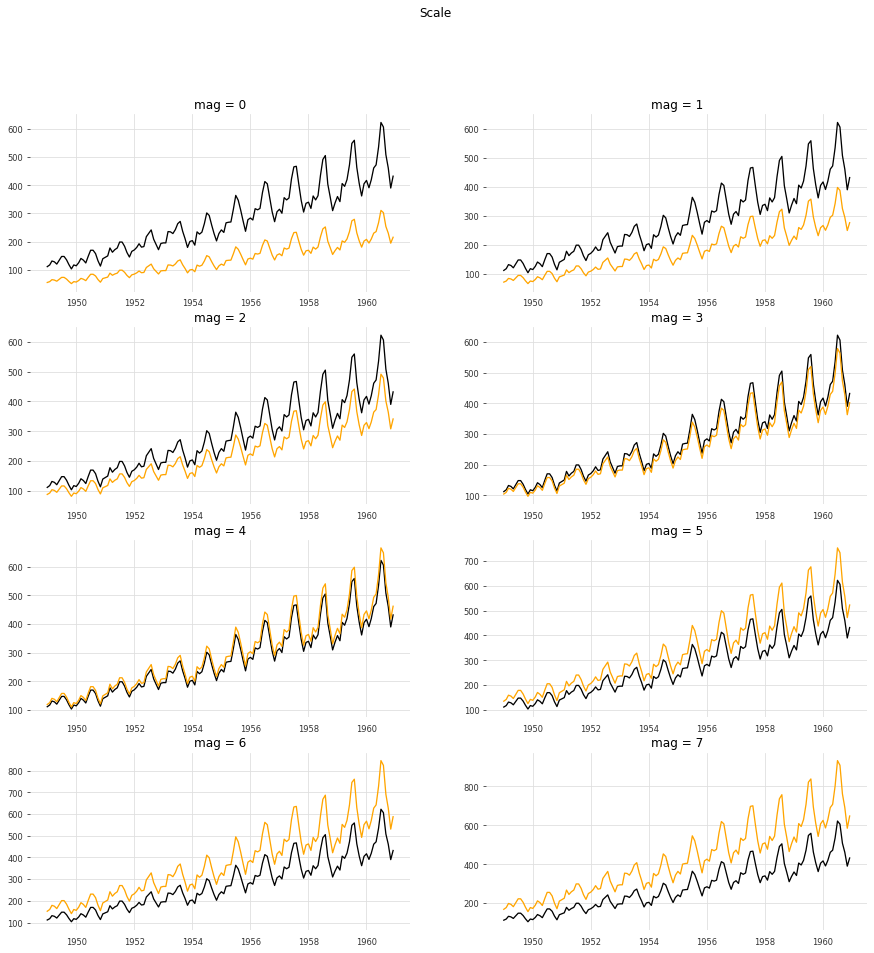

In [11]:
da.plot_augmentation(data,seasonality,"Scale")

# Reverse

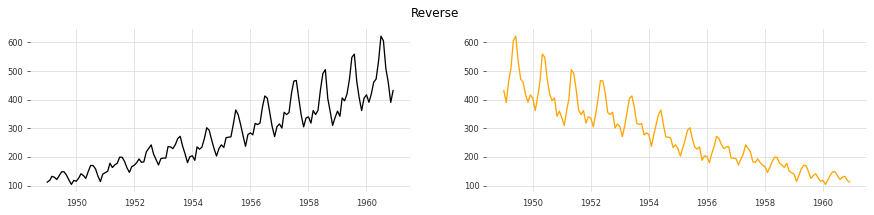

In [12]:
da.plot_augmentation(data,seasonality,"Reverse")

# Smoothing - Temporal Smoothness (Least Squares)

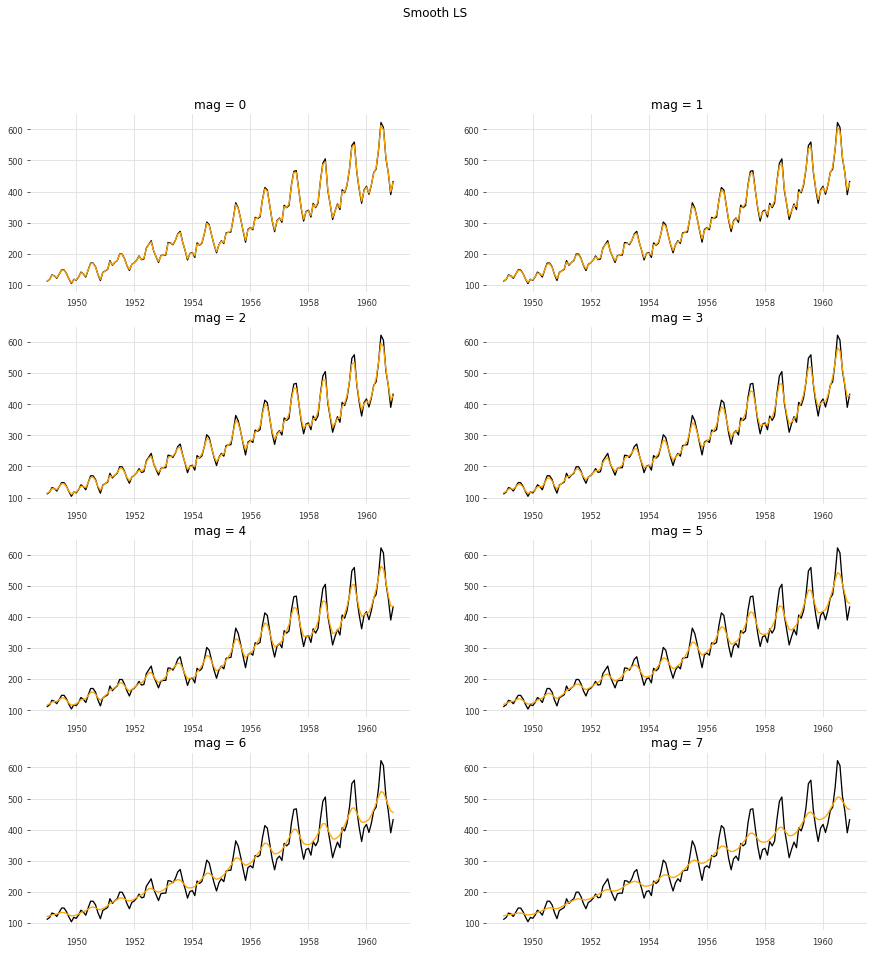

In [13]:
da.plot_augmentation(data,seasonality,"Smooth LS")

# Smoothing ETS

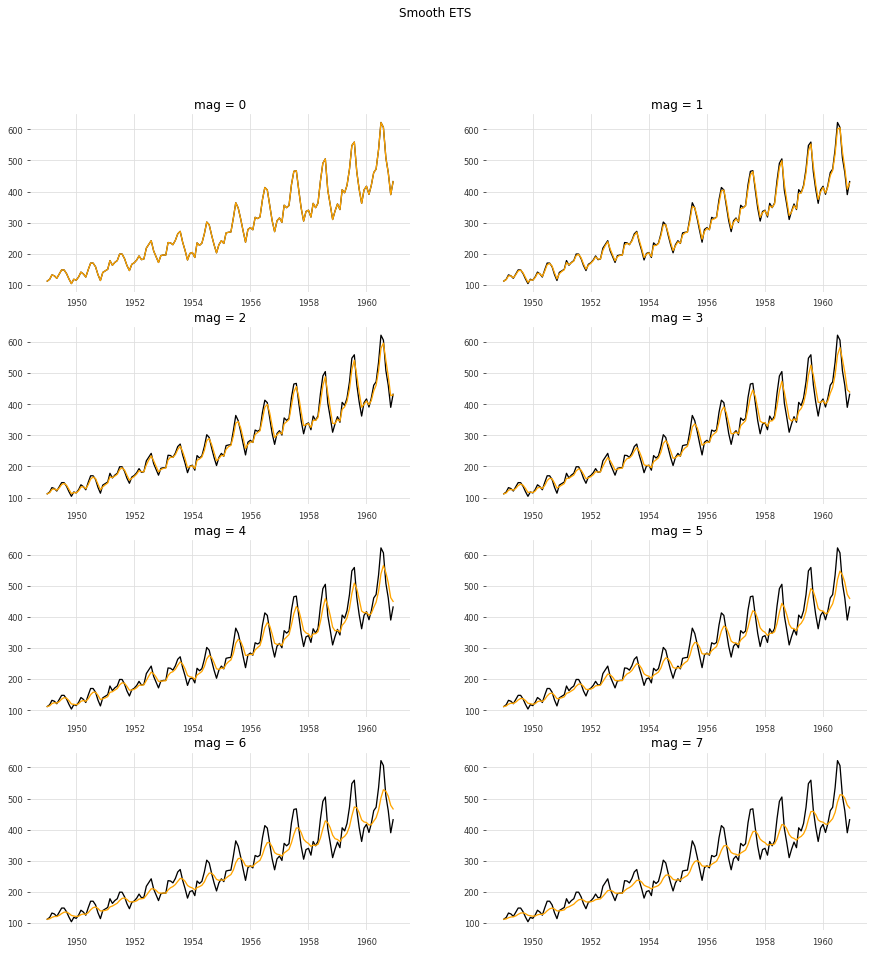

In [14]:
da.plot_augmentation(data,seasonality,"Smooth ETS")

# MBB

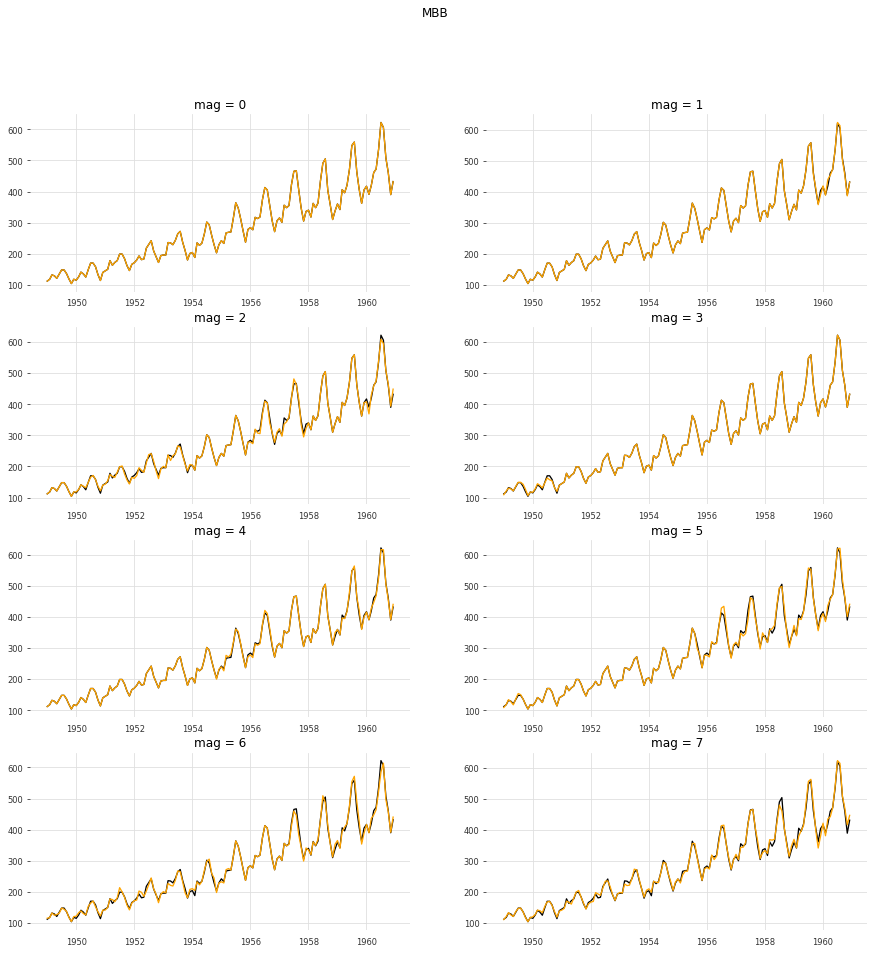

In [15]:
da.plot_augmentation(data,seasonality,"MBB")

# Gaussian time warping

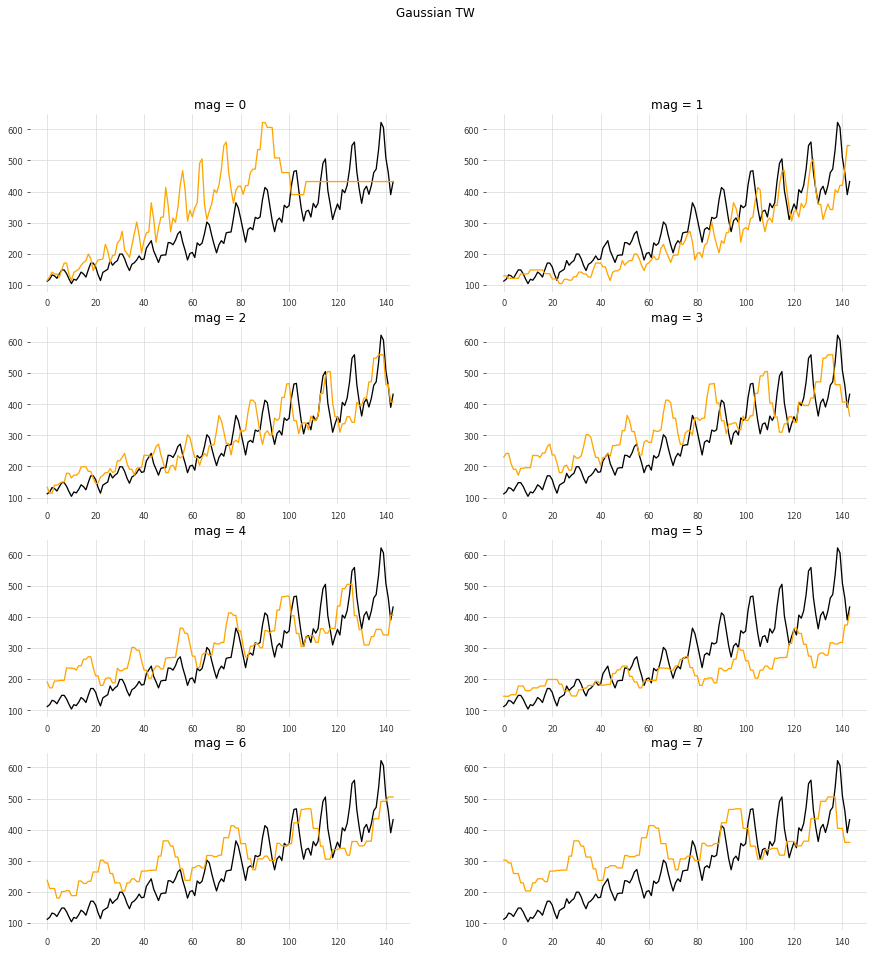

In [16]:

da.plot_augmentation(data,seasonality,"Gaussian TW")

# Dynamic Time Stretching

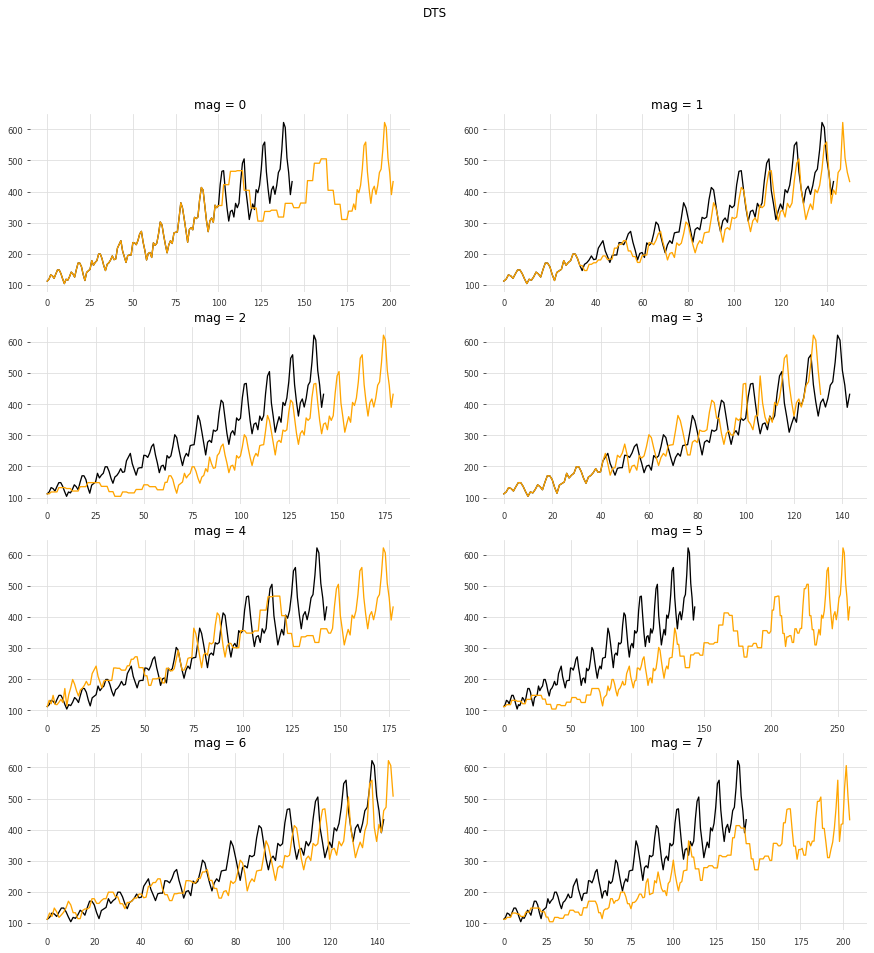

In [17]:
da.plot_augmentation(data,seasonality,"DTS")

# Window Warping

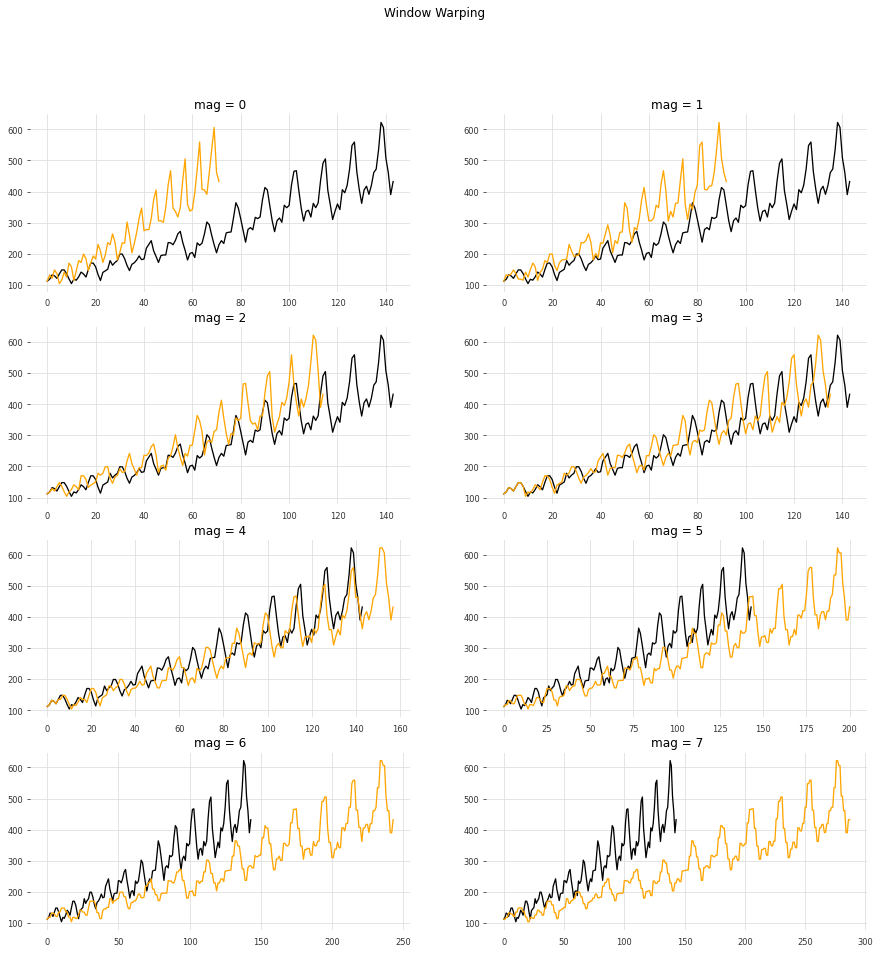

In [18]:
da.plot_augmentation(data,seasonality,"Window Warping")